In [136]:
## Earthquake number distribution

%matplotlib inline
import os
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt, ticker, dates as mdates
from scipy.io import loadmat
from pysar.simulation.plot import *
from pysar.utils import utils as ut, ptime, plot as pp
from pysar import view

work_dir = os.path.expanduser('~/development/python/2019_Kirishima/Shinmoedake_TS')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
    print('create directory', work_dir)
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/development/python/2019_Kirishima/Shinmoedake_TS


In [76]:
## Read InSAR displacement
# ALOS Desc T73
ts_file1 = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosDT73/PYSAR/timeseries_ECMWF_ramp_demErr.h5')
lat1, lon1 = 31.9121, 130.8854
dates1, dis1 = ut.read_timeseries_lalo(lat1, lon1, ts_file1)
dis1 *= 100. #cm
# ALOS Asc T424
ts_file2 = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosAT424/PYSAR/timeseries_ECMWF_ramp_demErr.h5')
lat2, lon2 = 31.9143, 130.8810
dates2, dis2 = ut.read_timeseries_lalo(lat2, lon2, ts_file2)
dis2 *= 100. #cm

input lat / lon: 31.9121 / 130.8854
input y / x: 101 / 128
input lat / lon: 31.9143 / 130.881
input y / x: 93 / 112


save figure to file /Users/yunjunz/development/python/2019_Kirishima/Shinmoedake_TS/dis_map.png


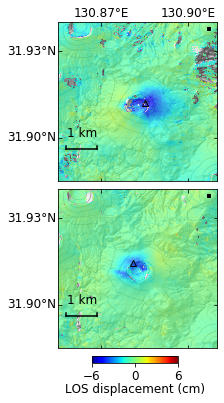

In [162]:
## Figure 2. (a-b) Map view of deformation from InSAR
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[3, 6], sharex=True)

# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoedake.dem.wgs84')
opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c jet -u cm --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar '
opt += ' --scalebar 0.25 0.15 0.2 --scalebar-pad 0.1 --noverbose --alpha 0.7 '

# ALOS desc T73
mask_file1 = os.path.join(os.path.dirname(ts_file1), 'maskTempCoh.h5')
cmd = 'view.py {ts} 20100302 --ref-date 20081127 --mask {m} -v -6 6 --lalo-loc 1 0 1 0 {o}'.format(ts=ts_file1, m=mask_file1, o=opt)
data1, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], data1, atr, inps)
axs[0].plot(lon1, lat1, "k^", mfc='none', mew=1., ms=6)

# ALOS asc T424
mask_file2 = os.path.join(os.path.dirname(ts_file2), 'maskTempCoh.h5')
cmd = 'view.py {ts} 20100217 --ref-date 20080329 --mask {m} -v -6 6 --lalo-loc 1 0 0 0 {o}'.format(ts=ts_file2, m=mask_file2, o=opt)
data2, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], data2, atr, inps)
axs[1].plot(lon2, lat2, "k^", mfc='none', mew=1., ms=6)
fig.subplots_adjust(hspace=0.05)

# colorbar
cax = fig.add_axes([0.3, 0.09, 0.4, 0.015])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-6, 0, 6])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement (cm)', fontsize=font_size, labelpad=0)

# output
out_file = os.path.abspath('dis_map.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [140]:
## Read Number of EQ
num_eq_file = os.path.expanduser('~/insarlab/Kirishima/Seismic/EQ_num.txt')
txt_content = np.loadtxt(num_eq_file, dtype=bytes).astype(str)
eq_dates = np.array([datetime.datetime.strptime(i, '%Y-%m-%d') for i in txt_content[:,0]])
eq_num = txt_content[:,1].astype(np.int16)

## Read GPS baseline change
gps_len_file = os.path.expanduser('~/insarlab/Kirishima/GPS/GSI_F3/len_960714_950486.mat')
gps_len_mat = loadmat(os.path.join(gps_dir, gps_len_file))
gps_lens = gps_len_mat['Len'].flatten() * 100.
gps_dates = [ptime.datenum2datetime(i) for i in gps_len_mat['T'].flatten()]
# start from zero
idx = gps_dates.index(dt(2005, 12, 15, 12, 0))
gps_lens -= gps_lens[idx]

save figure to file /Users/yunjunz/development/python/2019_Kirishima/Shinmoedake_TS/dis_ts.png


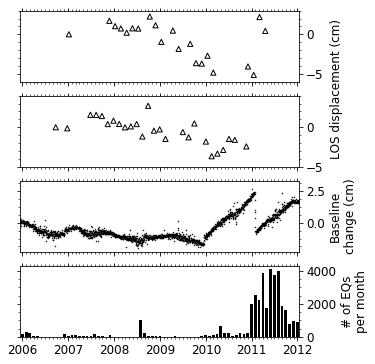

In [159]:
## Figure 2 (c-f) - Time-series of deformation from InSAR, GPS and number of earthquakes

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=[5, 6], sharex=True)

axs[0].scatter(dates1, dis1, marker='^', edgecolor='k', facecolors='none', s=3**3)
axs[0].set_ylim([-6, 3])

axs[1].scatter(dates2, dis2, marker='^', edgecolor='k', facecolors='none', s=3**3)
axs[1].set_ylim([-5, 4])
pp.set_shared_ylabel(axs[0:2], label='LOS displacement (cm)', font_size=font_size, labelpad=0.88, position='right')

axs[2].scatter(gps_dates, gps_lens, marker='.', color='k', s=1**2)
axs[2].set_ylabel('Baseline\nchange (cm)', fontsize=font_size)

#axs[3].bar(dates+datetime.timedelta(days=15), eq_num, width=22, color='k')
axs[3].bar(dates, eq_num, width=22, color='k')
axs[3].set_ylabel('# of EQs\nper month', fontsize=font_size)

for ax in axs:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax.set_xlim(dt(2005, 12, 15), dt(2012, 1, 15))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[3].yaxis.set_major_locator(ticker.MultipleLocator(2000))

# output
out_file = os.path.abspath('dis_ts.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()